In [4]:
#example of loading MNIST dataset
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [5]:
#Load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [7]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
print(trainX.shape, trainy.shape, testX.shape, testy.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


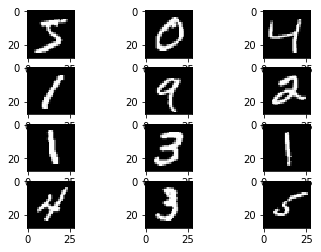

In [55]:
for i in range(12):
    #define subplot
    plt.subplot(4,3,i+1)
    #plot raw pixel data
    plt.imshow(trainX[i], cmap = plt.get_cmap('gray'))
#show the figure
plt.show()

In [49]:
trainX[0][1].shape

(28,)

In [74]:
from keras.utils import to_categorical
# load train and test dataset
def reshape_dataset():
    # reshape dataset to have a single channel
    # data will be passed pixel after pixel
    trainXreshape = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testXreshape = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainYreshape = to_categorical(trainy)
    testYreshape = to_categorical(testy)
    return trainXreshape, trainYreshape, testXreshape, testYreshape

trainx, trainY, testx, testY = reshape_dataset()

In [105]:
#normalizing data
def normalize_data(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

train_norm, test_norm = normalize_data(trainx, testx)

In [104]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD

# define cnn model
def define_model():
    model = Sequential()
    #out of 784 pixels in each image, i need 3*3 images of 32 in count
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #Stochastic gradient descent
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model()

In [89]:
from sklearn.model_selection import KFold

# evaluate a model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [94]:
evaluate_model(model, trainx, trainY, n_folds=5)


> 11.442
> 11.158
> 11.133
> 10.983
> 11.467


([0.11441666632890701,
  0.11158332973718643,
  0.11133333295583725,
  0.10983332991600037,
  0.1146666631102562],
  <keras.callbacks.callbacks.History at 0x2548ec3c780>])

In [106]:
model.fit(test_norm, testY, epochs =10, batch_size=32, validation_data=(test_norm,testY),verbose=0)

In [107]:
_, acc = model.evaluate(test_norm, testY, verbose = 0)
acc*100

99.94000196456909

In [144]:
label = testy[10:20].tolist()
#test_norm[0]
my_data = test_norm.reshape(len(test_norm),28,28,1)[10:20]
predictions = model.predict(my_data).tolist()
label_pred = [p.index(max(p)) for p in predictions]
print(label)
print(label_pred)



[0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
[0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


In [147]:
#classification report
predictions = model.predict(test_norm)
predictions.shape

(10000, 10)

In [150]:
from sklearn.metrics import classification_report
import numpy as np

label = testy.reshape(10000,1)
label_pred = np.array([p.tolist().index(max(p)) for p in predictions])

cr = classification_report(label, label_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       1.00      1.00      1.00       892
           6       1.00      1.00      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      1.00      1.00      1009

   micro avg       1.00      1.00      1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

